### Классная работа

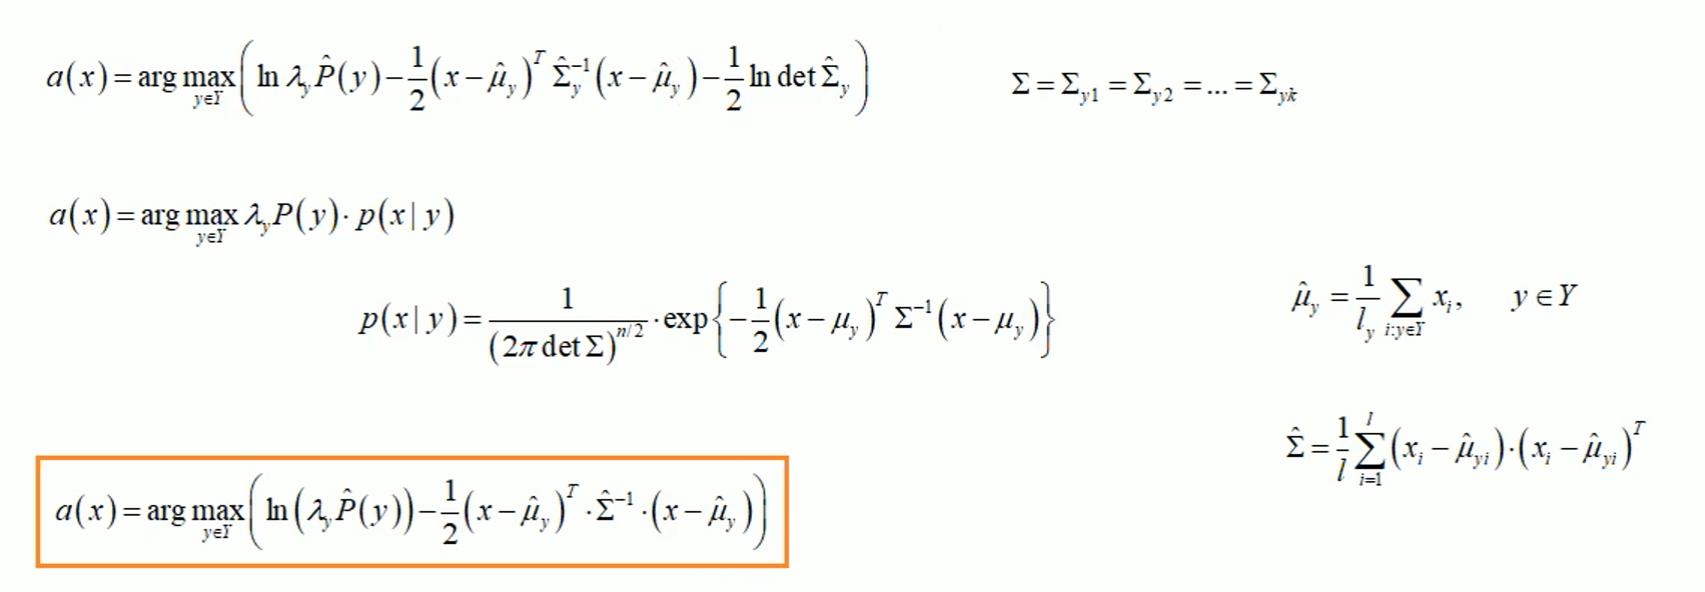
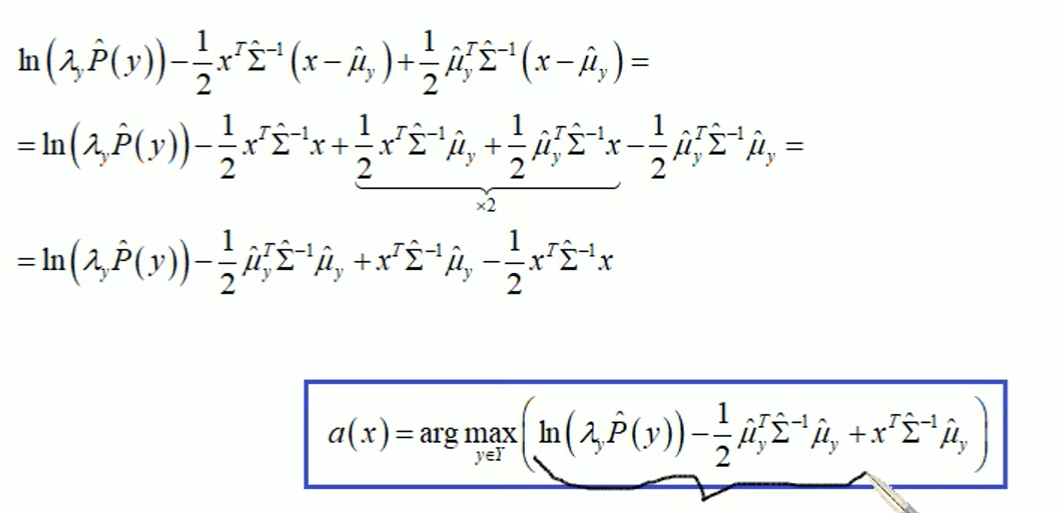
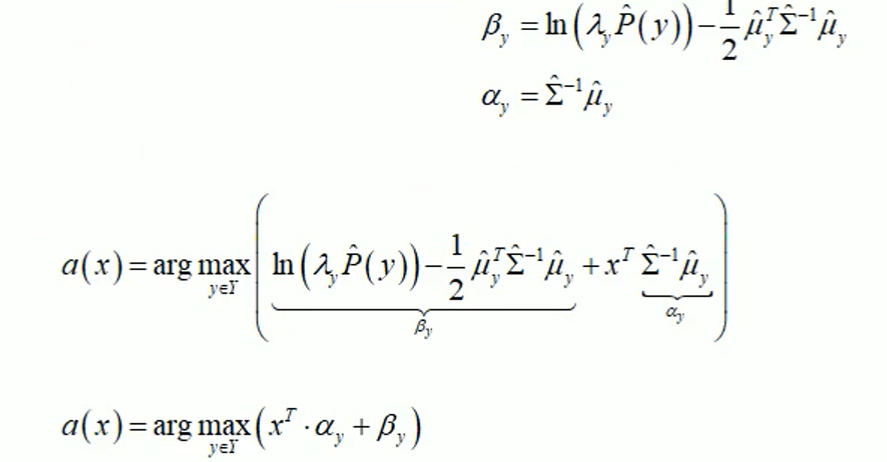

### Домашняя работа

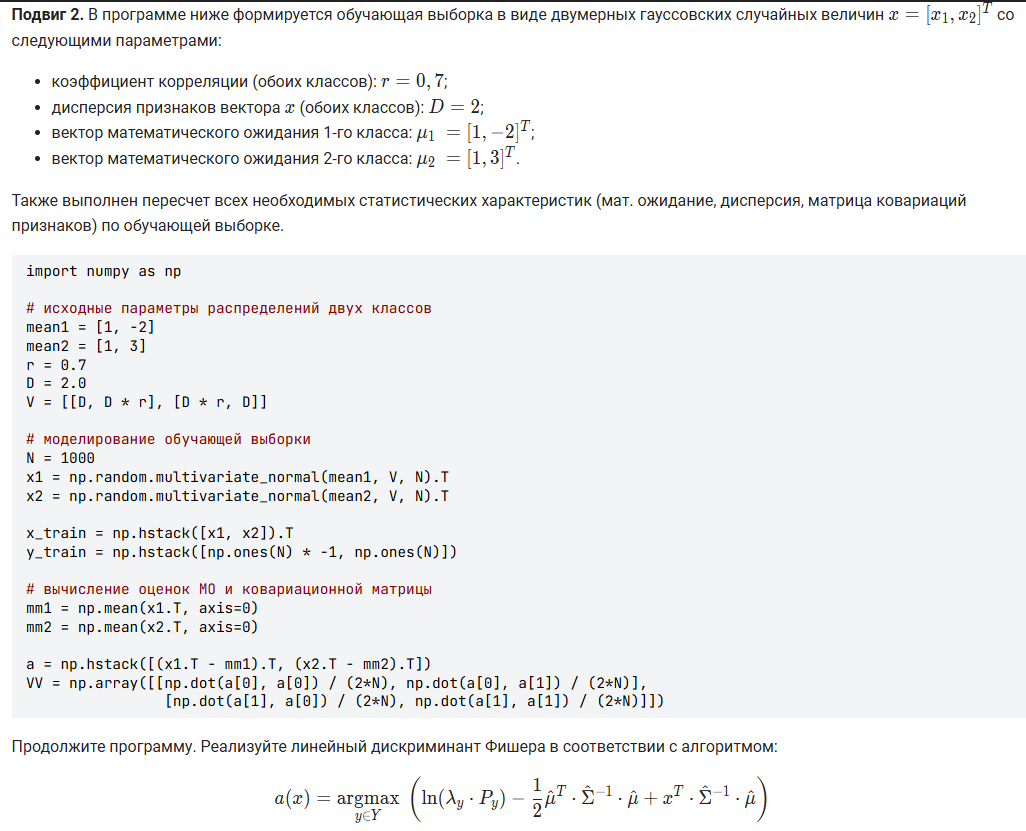
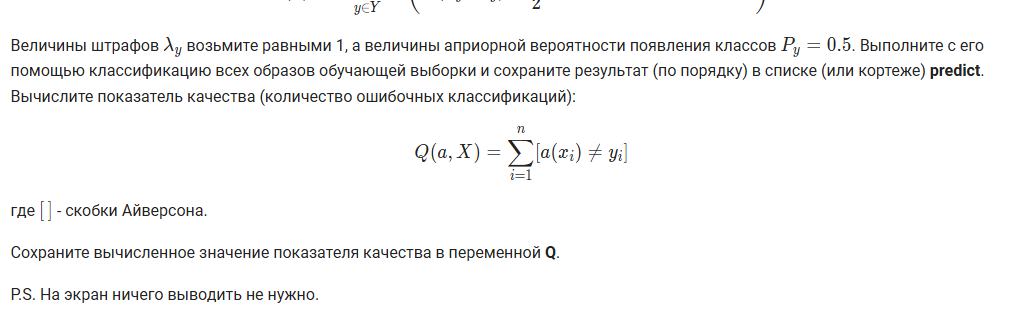

In [3]:
import numpy as np

np.random.seed(0)

# исходные параметры распределений двух классов
mean1 = [1, -2]
mean2 = [1, 3]
r = 0.7
D = 2.0
V = [[D, D * r], [D * r, D]]

# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V, N).T
x2 = np.random.multivariate_normal(mean2, V, N).T

x_train = np.hstack([x1, x2]).T
y_train = np.hstack([np.ones(N) * -1, np.ones(N)])

# вычисление оценок МО и ковариационной матрицы
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = np.hstack([(x1.T - mm1).T, (x2.T - mm2).T])
VV = np.array([[np.dot(a[0], a[0]) / (2*N), np.dot(a[0], a[1]) / (2*N)],
                [np.dot(a[1], a[0]) / (2*N), np.dot(a[1], a[1]) / (2*N)]])

# вероятность класса и штраф
P1, L1 = 0.5, 1
P2, L2 = 0.5, 1

proba = lambda x, py, m, v, l: np.log(l*py) - 1/2*m.T@np.linalg.inv(v)@m + x.T@np.linalg.inv(v)@m
model = lambda a1, a2: np.argmax([a1, a2]) * 2 - 1

predict = []
for x in x_train:
    a1 = proba(x, P1, mm1, VV, L1)
    a2 = proba(x, P2, mm2, VV, L2)
    pred = model(a1, a2)
    predict.append(pred)
predict = np.array(predict)
Q = np.sum(predict != y_train)
Q

8

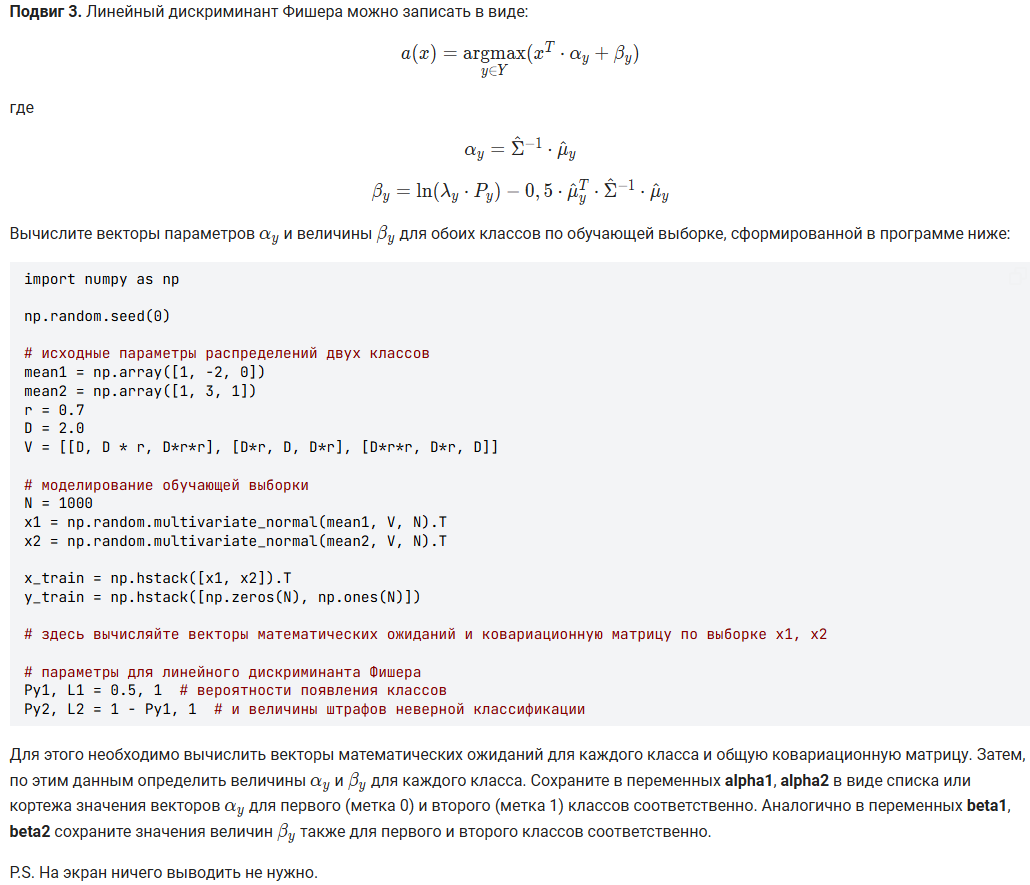

In [13]:
import numpy as np

np.random.seed(0)

# исходные параметры распределений двух классов
mean1 = np.array([1, -2, 0])
mean2 = np.array([1, 3, 1])
r = 0.7
D = 2.0
V = [[D, D * r, D*r*r], [D*r, D, D*r], [D*r*r, D*r, D]]

# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V, N).T
x2 = np.random.multivariate_normal(mean2, V, N).T

x_train = np.hstack([x1, x2]).T
y_train = np.hstack([np.zeros(N), np.ones(N)])

# здесь вычисляйте векторы математических ожиданий и ковариационную матрицу по выборке x1, x2

# параметры для линейного дискриминанта Фишера
Py1, L1 = 0.5, 1  # вероятности появления классов
Py2, L2 = 1 - Py1, 1  # и величины штрафов неверной классификации

mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = np.hstack([(x1.T - mm1).T, (x2.T - mm2).T])
VV = np.cov(a)
inverse_VV = np.linalg.inv(VV)

alpha1 = inverse_VV @ mm1
alpha2 = inverse_VV @ mm2

beta1 = np.log(L1*Py1) - 1/2 * mm1.T @ inverse_VV @ mm1
beta2 = np.log(L2*Py2) - 1/2 * mm2.T @ inverse_VV @ mm2

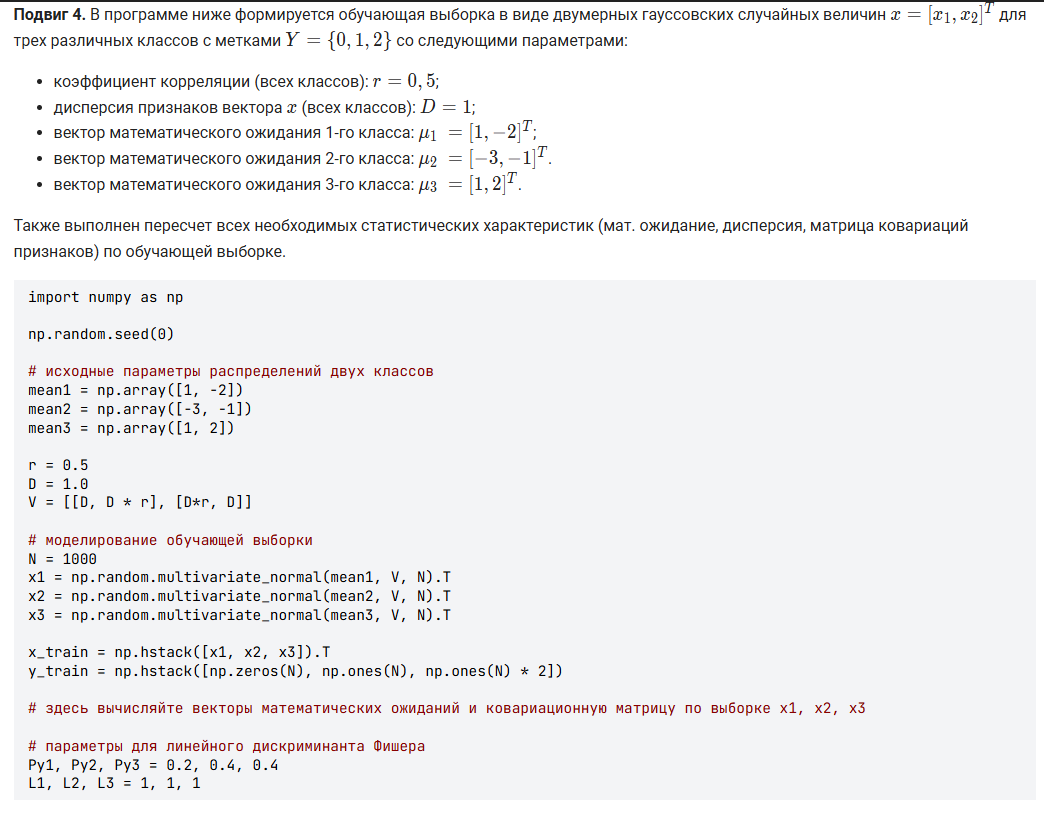
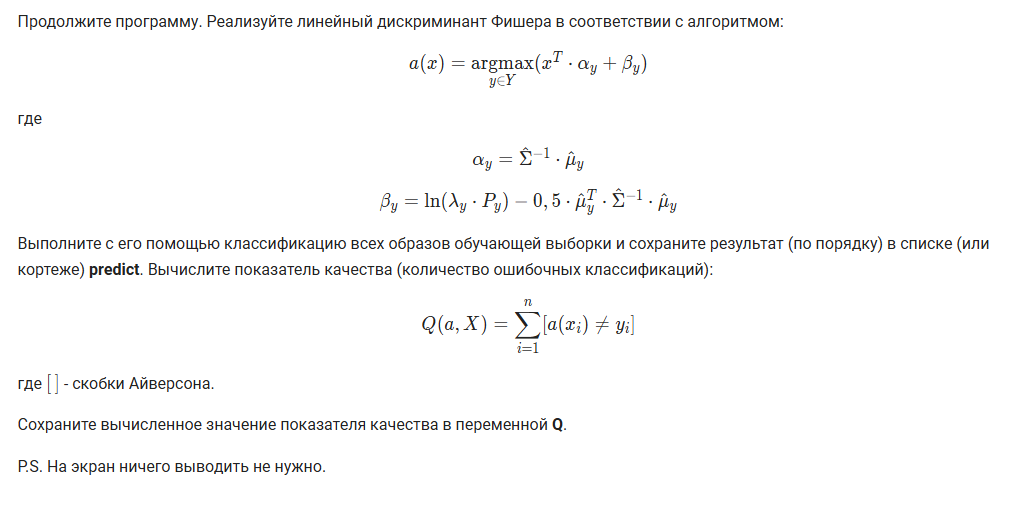

60


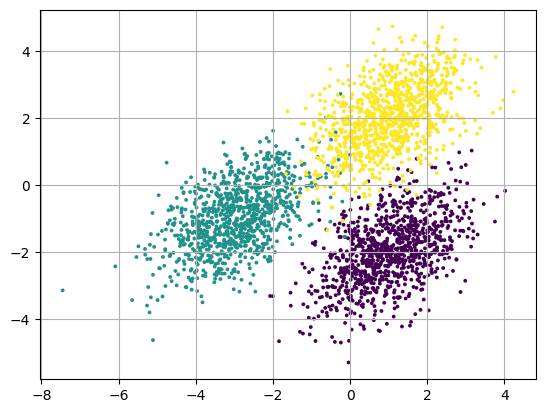

In [34]:
import numpy as np

np.random.seed(0)

# исходные параметры распределений двух классов
mean1 = np.array([1, -2])
mean2 = np.array([-3, -1])
mean3 = np.array([1, 2])

r = 0.5
D = 1.0
V = [[D, D * r], [D*r, D]]

# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V, N).T
x2 = np.random.multivariate_normal(mean2, V, N).T
x3 = np.random.multivariate_normal(mean3, V, N).T

x_train = np.hstack([x1, x2, x3]).T
y_train = np.hstack([np.zeros(N), np.ones(N), np.ones(N) * 2])

# здесь вычисляйте векторы математических ожиданий и ковариационную матрицу по выборке x1, x2, x3
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)
mm3 = np.mean(x3.T, axis=0)

a = np.hstack([(x1.T - mm1).T, (x2.T - mm2).T, (x3.T - mm3).T])
VV = np.cov(a)
inv_VV = np.linalg.inv(VV)

# параметры для линейного дискриминанта Фишера
Py1, Py2, Py3 = 0.2, 0.4, 0.4
L1, L2, L3 = 1, 1, 1

alpha = lambda iv, m: iv @ m
beta = lambda l, py, m, iv: np.log(l*py) - 1/2*m.T@iv@m
proba = lambda x, l, py, m, iv: x.T @ alpha(iv, m) + beta(l, py, m, iv)
model = lambda pr1, pr2, pr3: np.argmax([pr1, pr2, pr3])

predict = []
for x in x_train:
    pr1 = proba(x, L1, Py1, mm1, inv_VV)
    pr2 = proba(x, L2, Py2, mm2, inv_VV)
    pr3 = proba(x, L3, Py3, mm3, inv_VV)

    pred = model(pr1, pr2, pr3)
    predict.append(pred)
Q = sum(predict != y_train)
print(Q)

import matplotlib.pyplot as plt

plt.grid(True)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=3);

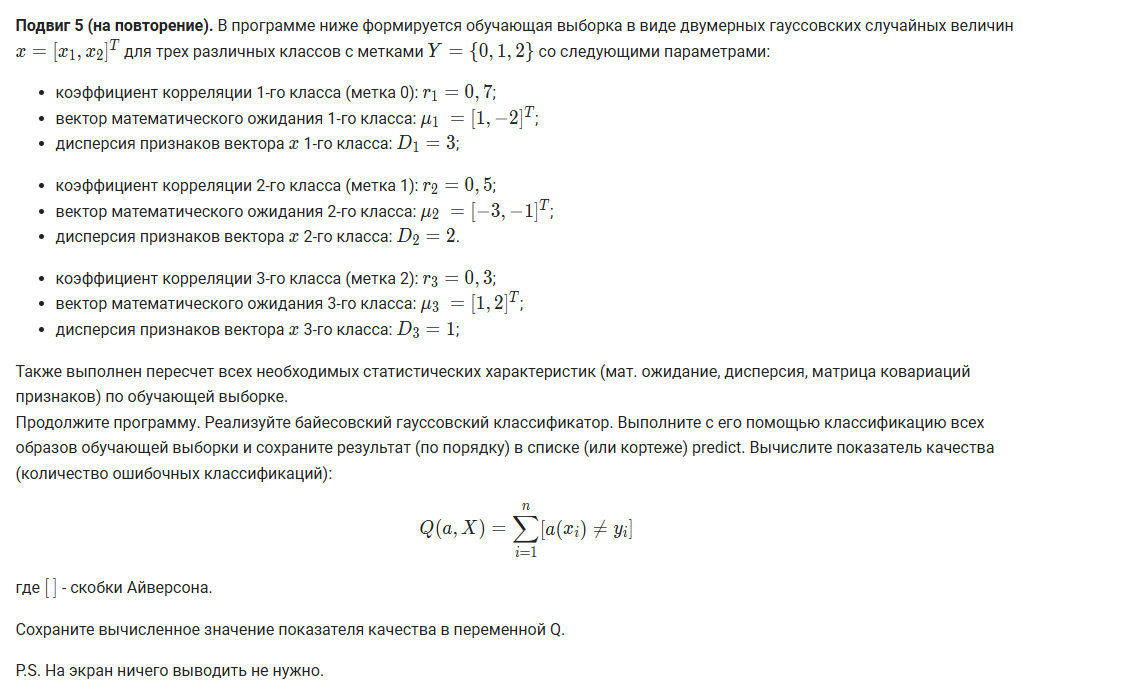

In [1]:
import numpy as np

np.random.seed(0)

# исходные параметры распределений трех классов
r1 = 0.7
D1 = 3.0
mean1 = [1, -2]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.5
D2 = 2.0
mean2 = [-3, -1]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

r3 = 0.3
D3 = 1.0
mean3 = [1, 2]
V3 = [[D3, D3 * r3], [D3 * r3, D3]]

# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T
x3 = np.random.multivariate_normal(mean3, V3, N).T

x_train = np.hstack([x1, x2, x3]).T
y_train = np.hstack([np.zeros(N), np.ones(N), np.ones(N) * 2])

mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)
mm3 = np.mean(x3.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x3.T - mm3).T
VV3 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

# параметры для гауссовского байесовского классификатора
Py1, Py2, Py3 = 0.2, 0.5, 0.3
L1, L2, L3 = 1, 1, 1

proba = lambda x, l, py, m, v: np.log(l*py) - 1/2*(x-m).T@np.linalg.inv(v)@(x-m) - 1/2*np.log(np.linalg.det(v))
model = lambda pr1, pr2, pr3: np.argmax([pr1, pr2, pr3])

predict = []
for x in x_train:
    pr1 = proba(x, L1, Py1, mm1, VV1)
    pr2 = proba(x, L2, Py2, mm2, VV2)
    pr3 = proba(x, L3, Py3, mm3, VV3)

    pred = model(pr1, pr2, pr3)
    predict.append(pred)
Q = sum(predict != y_train)
Q

189